In [1]:
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from sklearn import metrics
from tensorflow.python.data import Dataset

import math
import numpy as np
import pandas as pd
import tensorflow as tf

In [33]:
pd.options.display.max_rows = 5
pd.options.display.float_format = '{:.1f}'.format

In [34]:
dataset = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv', sep = ',')

In [42]:
class preprocess_data:
    features = pd.DataFrame()
    targets = pd.DataFrame()
    
    def __init__(self, dataFrame):
        selected_features = dataFrame[
            [
                'latitude',
                'longitude',
                'total_rooms',
                'population'
            ]
        ]
        self.features = selected_features.copy()
        self.features['rooms_per_person'] = (self.features['total_rooms'] / self.features['population'])
        self.targets['house_value'] = (dataFrame['median_house_value'] / 1000)

In [49]:
DB_train = preprocess_data(dataset.head(12000))
XS_train = DB_train.features
YS_train = DB_train.targets

DB_test = preprocess_data(dataset.tail(5000))
XS_test = DB_test.features
YS_test = DB_test.targets

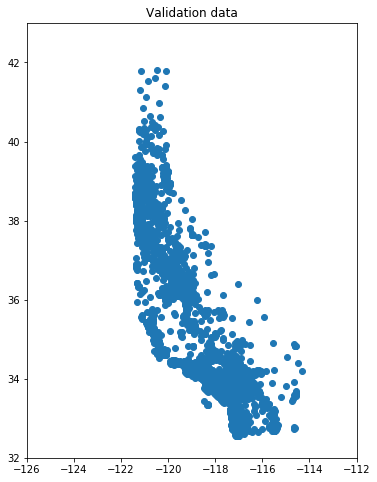

In [64]:
train_fig = plt.figure(figsize = (13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])

plt.scatter(XS_train['longitude'],
            XS_train['latitude'],
            cmap = 'coolwarm')
_ = plt.plot()

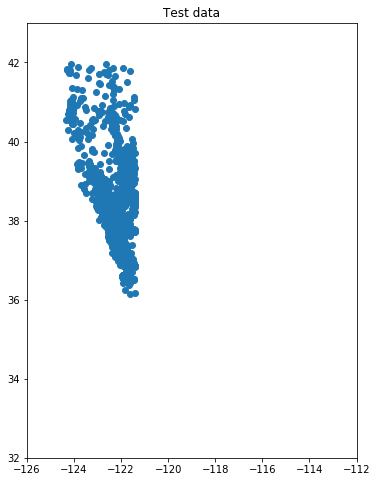

In [65]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 2)
ax.set_title("Test data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])

plt.scatter(XS_test['longitude'],
            XS_test['latitude'],
            cmap = 'coolwarm'
           'r')
_ = plt.plot()